In [2]:
#1.导入需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#2.读取数据集
dataset = pd.read_csv('AirQualityUCI.csv')
X = dataset.iloc[5:10, 5:8].values 
y = dataset.iloc[:5, 4].values

In [9]:
#3.可视化
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
np.random.seed(123)
variables = ['X','Y','Z']
labels=['ID_0','ID_1','ID_2','ID_3','ID_4']
row_clusters = linkage(pdist(X,metric='euclidean'),method='complete')
print(pd.DataFrame(row_clusters,columns=['row label1','row label2','distance','no. of items in clust.'],index=['cluster %d'%(i+1) for i in range(row_clusters.shape[0])]))

           row label1  row label2    distance  no. of items in clust.
cluster 1         1.0         2.0   18.002500                     2.0
cluster 2         0.0         5.0   82.552771                     3.0
cluster 3         3.0         6.0  147.725286                     4.0
cluster 4         4.0         7.0  345.327381                     5.0


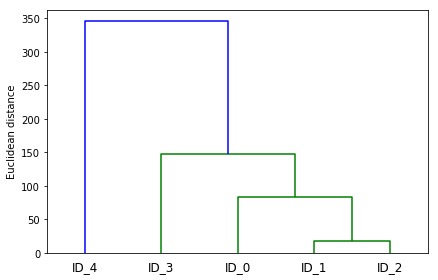

In [10]:
#层次聚类树
row_dendr = dendrogram(row_clusters,labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


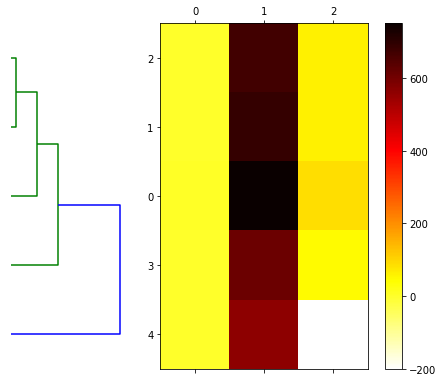

In [13]:
#层次聚类热度图
fig =plt.figure(figsize=(8,8))
axd =fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(row_clusters,orientation='right')
X = pd.DataFrame(X)
X_rowclust = X.ix[row_dendr['leaves'][::-1]]
axm = fig.add_axes([0.23,0.1,0.6,0.6])
cax = axm.matshow(X_rowclust,interpolation='nearest',cmap='hot_r')
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels(['']+list(X_rowclust.columns))
axm.set_yticklabels(['']+list(X_rowclust.index))
plt.show()